In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (18,12)
mpl.rcParams['axes.grid'] = False
sns.set_style('whitegrid')

import torch
import torch.nn as nn

In [18]:
# Upload the data frame into the notebook
data_frame = pd.read_csv('Data/learn_noise_siso2.csv')
test_frame = pd.read_csv('Data/test_jump_siso2.csv')
prediction_test_frame = pd.read_csv('Data/test_jump_siso2.csv', nrows=2)

In [19]:
display(data_frame.head(5))

,Y,U
0,0.000000,-0.709580
1,0.000000,2.414775
2,-2.398553,-0.127366
3,-1.391219,-0.705401
4,10.120519,3.228365


In [20]:
# Defining a batch size based on the data
batch_size = 100

# Split the dataset into different batches
batch_data = np.array_split(data_frame, int(data_frame.shape[0]/batch_size))

# Shifting batch number 5 to the end to be used as a test data
# batch_data.append(batch_data.pop(1))

# Combining all the batches to form a single dataset
df = pd.DataFrame(np.concatenate(batch_data),columns=list(data_frame.columns))

In [21]:
batch_data

[            Y         U
 0    0.000000 -0.709580
 1    0.000000  2.414775
 2   -2.398553 -0.127366
 3   -1.391219 -0.705401
 4   10.120519  3.228365
 ..        ...       ...
 95   9.453566 -3.223227
 96   5.709890 -1.572641
 97   1.887747  0.456138
 98   4.855706  2.215907
 99  28.642398 -5.540415
 
 [100 rows x 2 columns],
             Y         U
 100  5.752777  0.460827
 101  0.148571  0.710389
 102  0.305527  0.972343
 103  6.656395  2.737168
 104  6.509414 -3.030056
 ..        ...       ...
 195 -3.004009  0.002685
 196 -2.111992  0.749498
 197  3.487160  2.439646
 198 -1.363261  0.889307
 199 -0.817065 -1.026607
 
 [100 rows x 2 columns],
             Y         U
 200  2.489390 -1.408547
 201  2.878575 -1.045814
 202  3.760987  1.539678
 203 -1.280329 -0.031454
 204 -0.763387  0.334811
 ..        ...       ...
 295  1.525532  0.702789
 296  8.184531 -2.914452
 297  2.953566  0.105251
 298  2.237386 -1.415965
 299  4.276298  1.571263
 
 [100 rows x 2 columns],
              Y    

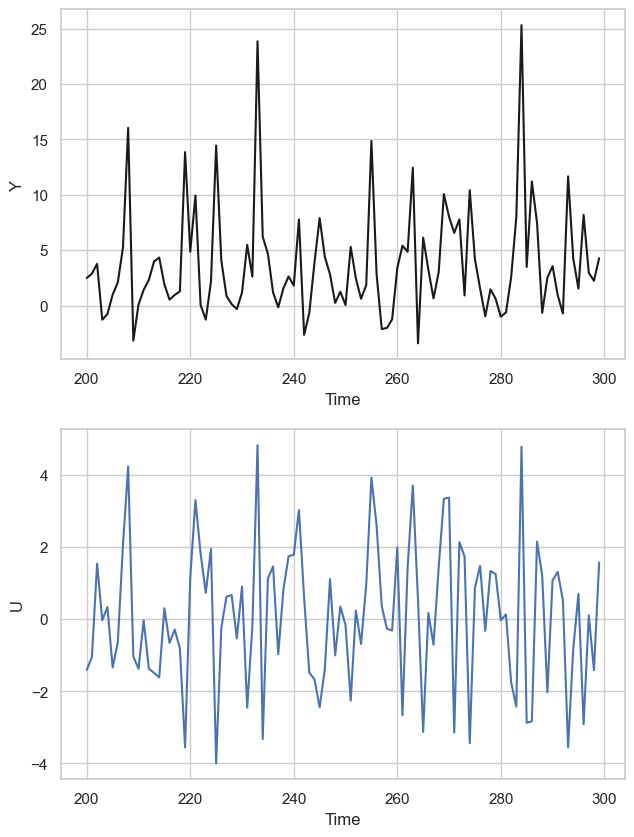

In [22]:
# Plotting the test data batch
fig = plt.figure(figsize=(16,10))

batch_no = 3

plt.subplot(2, 2, 1)
plt.plot(batch_data[batch_no-1]['Y'],'k')
plt.xlabel('Time')
plt.ylabel('Y')


plt.subplot(2, 2, 3)
plt.plot(batch_data[batch_no-1]['U'],'b')
plt.xlabel('Time')
plt.ylabel('U')


plt.show()

In [23]:
# Define a test size
test_size = batch_size

y = df.values.astype(float)
y_test = test_frame.values.astype(float)
y_pred_test = prediction_test_frame.values.astype(float)

# Create train and test sets
train_set = y
test_set = y_test
pred_test_set = y_pred_test
print(test_set)
# Convert train set into a torch tensor
train_set = torch.FloatTensor(train_set).view(-1,df.shape[1])
test_set = torch.FloatTensor(test_set).view(-1,df.shape[1])
pred_test_set= torch.FloatTensor(pred_test_set).view(-1,df.shape[1])

[[0.         0.        ]
 [0.         0.        ]
 [1.         1.        ]
 [1.         1.        ]
 [2.75       1.        ]
 [2.68613139 1.        ]
 [1.68944006 1.        ]
 [1.88042735 1.        ]
 [2.2545456  1.        ]
 [2.06237676 1.        ]
 [1.93783651 1.        ]
 [2.04499229 1.        ]
 [2.07823788 1.        ]
 [2.02072609 1.        ]
 [2.01871608 1.        ]
 [2.04493142 1.        ]
 [2.03994059 1.        ]
 [2.02917133 1.        ]
 [2.03382831 1.        ]
 [2.03765703 1.        ]
 [2.03468532 1.        ]
 [2.03362008 1.        ]
 [2.03520246 1.        ]
 [2.03532967 1.        ]
 [2.03458488 1.        ]
 [2.03469437 1.        ]
 [2.03500681 1.        ]
 [2.03488717 1.        ]
 [2.03477262 1.        ]
 [2.03485245 1.        ]
 [2.03488638 1.        ]
 [2.03484265 1.        ]
 [2.0348371  1.        ]
 [2.03485814 1.        ]
 [2.03485593 1.        ]
 [2.0348469  1.        ]
 [2.03484993 1.        ]
 [2.03485333 1.        ]
 [2.0348512  1.        ]
 [2.03485014 1.        ]


In [24]:
# Creating a function to generate the input data for the lstm 
def input_data(seq,ws):
    
    inp_data = []
    
    for bat in range(0,train_set.shape[0],batch_size):
        
        bat_seq = seq[bat:bat+101]
        l = len(bat_seq)
        
        window = []
        label = []
        
        for i in range(l-ws):
        
            window = bat_seq[i:i+ws]
            label = bat_seq[i+ws:i+ws+1,:2]

            inp_data.append((window,label))
        
    return inp_data

In [25]:
# Defining a window size for prediction
window_size = 1
train_data = input_data(train_set,window_size)

In [26]:
# from classy import LSTMModel
from classy import LSTMModel
# Creating a model instance, loss function and the optimizer

model = LSTMModel(2, 100, out_size=1, num_layers=4)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [27]:
display(model)

LSTMModel(
  (lstm_1): LSTM(2, 100, num_layers=4)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [28]:
display(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [29]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

   800
 40000
   400
   400
 40000
 40000
   400
   400
 40000
 40000
   400
   400
 40000
 40000
   400
   400
   100
     1
______
284101


In [30]:
display(model)

LSTMModel(
  (lstm_1): LSTM(2, 100, num_layers=4)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [31]:
# Set the number of epochs

epochs = 20
hidden=model.init_hidden(batch_size=1)

for epoch in range(epochs):
    
    # Running each batch separately 
    
    for bat in range(0,1400,100):
    
        for seq,label in train_data[bat:bat+100]:
            
            # set the optimization gradient to zero

            optimizer.zero_grad()
            # Make predictions on the current sequence

            y_pred = model(seq, hidden)  
            
            # Compute the loss

            loss = criterion(y_pred, label)
            
            # Perform back propogation and gradient descent

            loss.backward()

            optimizer.step()
                      


    if epoch%10 == 0:

        print(f'Epoch: {epoch} Loss: {loss.item():10.8f}')

learnt_hidden=hidden

c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 Loss: 2.70376039
Epoch: 10 Loss: 3.49813747


In [32]:
future = 100

# Set the model to evaluation mode

model.eval()
preds = [test_set[0,:1].reshape(-1,1)]
print(test_set[0,:1])
print(preds)
for i in range(future-1):
    
    seq = test_set[i].reshape(-1,2)
    
    # Informing PyTorch that I am no longer interested in the gradients
    
    with torch.no_grad():
        pred = model(seq, hidden)
        preds.append(pred)

        
print(preds)       

tensor([0.])
[tensor([[0.]])]
[tensor([[0.]]), tensor([[1.5494]]), tensor([[1.5494]]), tensor([[1.2571]]), tensor([[1.2571]]), tensor([[1.5679]]), tensor([[1.5628]]), tensor([[1.4247]]), tensor([[1.4606]]), tensor([[1.5175]]), tensor([[1.4905]]), tensor([[1.4705]]), tensor([[1.4878]]), tensor([[1.4929]]), tensor([[1.4840]]), tensor([[1.4837]]), tensor([[1.4878]]), tensor([[1.4870]]), tensor([[1.4853]]), tensor([[1.4861]]), tensor([[1.4866]]), tensor([[1.4862]]), tensor([[1.4860]]), tensor([[1.4863]]), tensor([[1.4863]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.4862]]), tensor([[1.48

In [33]:
predictions = np.array([pred.numpy() for pred in preds]).reshape(-1,1)
true_values = np.array(test_set[:,:1])

Text(0, 0.5, 'x1')

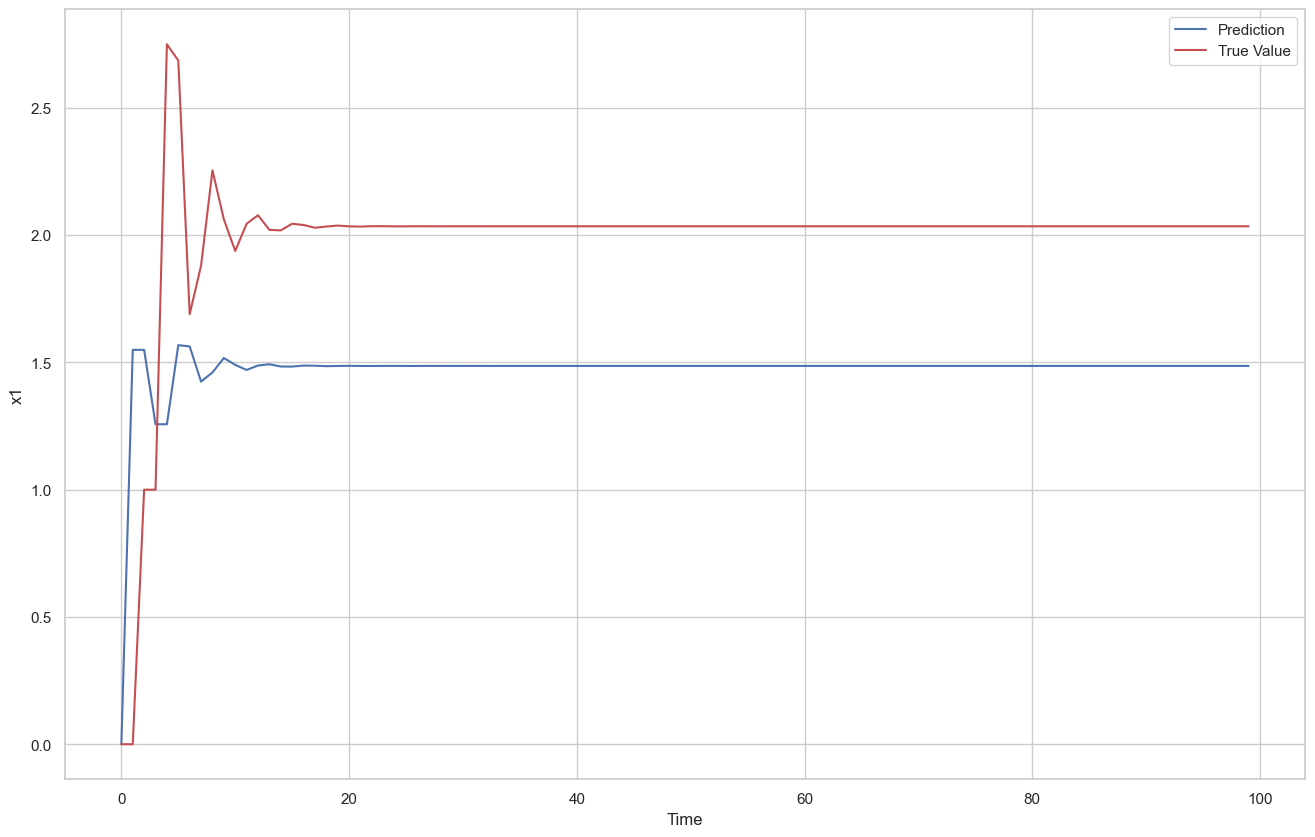

In [34]:
fig = plt.figure(figsize=(16,10))

plt.plot(predictions[:,0],'b',label='Prediction')
plt.plot(true_values[:,0],'r',label='True Value')
plt.legend()
plt.xlabel('Time')
plt.ylabel('x1')

In [35]:
RMSE = np.sqrt(np.sum(np.square((predictions - true_values[:,0])))/predictions.size)
display(RMSE)

6.33511342513889

In [36]:
future=100
hidden=learnt_hidden
preds = [test_set[0,:1].reshape(-1,1)]
print(test_set[0,:1])
print(preds)

for i in range(future-1):
    if i < len(pred_test_set):
        seq = test_set[i].reshape(-1, 2)
    else:
        x = torch.FloatTensor(preds[-1])  # Assuming preds[-1] contains the last prediction
        y = 1.0
        seq = torch.FloatTensor([x, y]).view(-1, df.shape[1])
            
    # Check if the sequence length is greater than 0
    if seq.size(0) > 0:
        # Informing PyTorch that I am no longer interested in the gradients
        with torch.no_grad():
            pred = model(seq, hidden)
            preds.append(pred)
            


tensor([0.])
[tensor([[0.]])]


In [37]:
predictions2 = np.array([pred.numpy() for pred in preds]).reshape(-1,1)
true_values = np.array(test_set[:,:1])

Text(0, 0.5, 'x1')

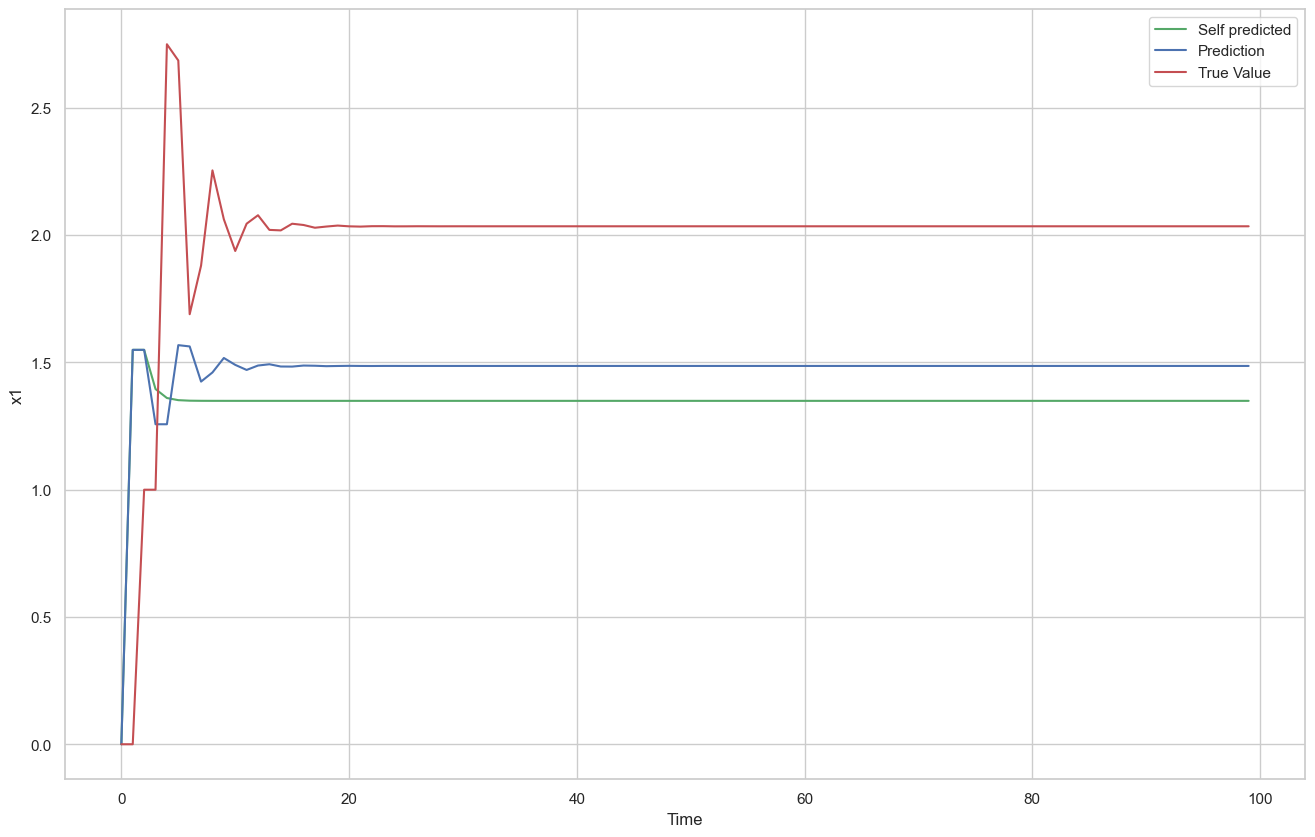

In [38]:
fig = plt.figure(figsize=(16,10))
plt.plot(predictions2[:,0],'g',label='Self predicted')
plt.plot(predictions[:,0],'b',label='Prediction')
plt.plot(true_values[:,0],'r',label='True Value')
plt.legend()
plt.xlabel('Time')
plt.ylabel('x1')